# <올리스트 데이터 분석 전처리 - Payments (지불정보데이터) 분석>
dataset : olist_order_payments_dataset.csv 
- 분석 내용
- 지불 방법 별 구매 비중 

# 0 데이터분석에 사용할 라이브러리 로드 

In [1]:
# 핑크색 warning 안내문 방지 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 분석에 사용할 라이브러리를 불러옵니다
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## cf) 폰트 설정

In [3]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(Colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 1 데이터 셋 로드 

In [4]:
import glob
path = glob.glob('data/*.csv')
path

['data\\olist_customers_dataset.csv',
 'data\\olist_geolocation_dataset.csv',
 'data\\olist_orders_dataset.csv',
 'data\\olist_order_items_dataset.csv',
 'data\\olist_order_payments_dataset.csv',
 'data\\olist_order_reviews_dataset.csv',
 'data\\olist_products_dataset.csv',
 'data\\olist_sellers_dataset.csv',
 'data\\product_category_name_translation.csv']

In [5]:
# 각각의 데이터셋 import 
df_customers = pd.read_csv(path[0])
df_geolocation = pd.read_csv(path[1])
df_orders = pd.read_csv(path[2])
df_items = pd.read_csv(path[3])
df_payments = pd.read_csv(path[4])
df_reviews = pd.read_csv(path[5])
df_products = pd.read_csv(path[6])
df_sellers = pd.read_csv(path[7])
df_category = pd.read_csv(path[8])

# 2 Merge를 이용해 각각의 데이터셋 병합 

In [6]:
# merge
df = df_customers.merge(df_orders, on = 'customer_id', how = 'left')
df = df.merge(df_items, on ='order_id', how = 'outer')
df = df.merge(df_payments, on ='order_id', how = 'outer', validate ='m:m')
df = df.merge(df_reviews, on ='order_id', how ='outer')
df = df.merge(df_products, on ='product_id', how ='outer')
df = df.merge(df_category, on ='product_category_name', how ='outer')

In [7]:
# 모든 컬럼 나오게 조정
pd.options.display.max_columns = None

# 3 데이터셋 정보 확인

In [8]:
df.shape

(119143, 37)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  order_item_id                 

In [10]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,credit_card,1.0,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,credit_card,1.0,275.79,7fc63200f12eebb5f387856afdd63db8,1.0,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1.0,credit_card,7.0,140.61,251191809e37c1cffc16865947c18a4d,3.0,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1.0,credit_card,10.0,137.58,f7123bac5b91a0e2e38d8b41fd1206f4,4.0,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [11]:
df.tail()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
119138,8325d6e7af2f2bfb58cf040729b232dd,a1d53377ab83871b0ad483b03ac69d6c,3570,sao paulo,SP,b99217b1fcf2fdeace7b8d869b76cb91,delivered,2018-03-07 17:42:06,2018-03-07 17:55:36,2018-03-08 20:09:40,2018-03-15 22:04:49,2018-04-02 00:00:00,1.0,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2018-03-13 17:55:36,39.99,10.15,1.0,credit_card,3.0,110.44,048757148581cbd2c92bc96ca5d73211,5.0,NaN,NaN,2018-03-16 00:00:00,2018-03-19 09:12:20,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
119139,85485f38b20ed1e287120d30cf39ee7d,f979a07fc18b2af3780a796ba14b96f4,4271,sao paulo,SP,9fa3a005f89a187501fa1bd63d6125fb,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-10 20:52:05,2017-10-16 21:59:33,2017-11-08 00:00:00,1.0,57bdf3098169cccdb62221bd3e089cbd,d98eec89afa3380e14463da2aabaea72,2017-10-16 01:17:50,39.99,14.10,1.0,credit_card,1.0,54.09,549f0948d29acee5033f72e52f07dc8e,5.0,NaN,NaN,2017-10-17 00:00:00,2017-10-21 01:21:12,fashion_roupa_infanto_juvenil,38.0,168.0,1.0,100.0,16.0,16.0,16.0,fashion_childrens_clothes
119140,14acb30bbc064408dcb8cdd3c92b0c97,1b553902a5bbe6ee54a3aaa7cbfb6816,26255,nova iguacu,RJ,ee86b68eb9222b0cad7da50f4f758a35,delivered,2017-05-17 17:44:34,2017-05-17 17:55:12,2017-05-18 16:28:06,2017-05-20 08:44:01,2017-06-09 00:00:00,1.0,0ab3ab3b2869073aa9afe795fe9151aa,28ea411b354f14b1a494be4e79f0ce02,2017-05-24 17:55:12,110.00,14.52,1.0,credit_card,1.0,124.52,50039c19c4f3549ef7d42ee1204cd37f,5.0,NaN,NaN,2017-05-21 00:00:00,2017-05-24 01:52:16,fashion_roupa_infanto_juvenil,52.0,494.0,4.0,600.0,36.0,10.0,26.0,fashion_childrens_clothes
119141,363d3a9b2ec5c5426608688ca033292d,d8bee9ec375c3a0f9ef8ed7456a51dcd,76940,rolim de moura,RO,2c4ada2e75c2ad41dd93cebb5df5f023,delivered,2017-01-26 11:09:00,2017-01-26 11:22:17,2017-01-27 14:59:35,2017-02-14 16:24:01,2017-03-07 00:00:00,1.0,6c7a0a349ad11817745e3ad58abd5c79,48162d548f5b1b11b9d29d1e01f75a61,2017-01-30 11:09:00,183.29,25.77,1.0,credit_card,1.0,209.06,82ec4a1c6f0134f607033e23431ee298,4.0,NaN,Envio muito rápido. Recomendo.,2017-02-15 00:00:00,2017-02-16 02:54:35,seguros_e_servicos,55.0,506.0,1.0,1225.0,27.0,35.0,15.0,security_and_services
119142,919570a26efbd068d6a0f66d5c5072a3,141e824b8e0df709e3fcf6d982225a8e,71940,brasilia,DF,bede3503afed051733eeb4a84d1adcc5,delivered,2017-09-17 16:51:43,2017-09-19 04:05:52,2017-09-19 20:22:49,2017-09-28 18:14:35,2017-10-11 00:00:00,1.0,8db75af9aed3315374db44d7860e25da,4e922959ae960d389249c378d1c939f5,2017-09-26 04:05:52,100.00,15.45,1.0,boleto,1.0,115.45,1067a7f22781153115958799dc72a8df,1.0,NaN,"boa tarde produto enviado errado, terei que me...",2017-09-29 00:00:00,2017-09-30 20:49:37,seguros_e_servicos,48.0,461.0,4.0,400.0,26.0,22.0,11.0,security_and_services


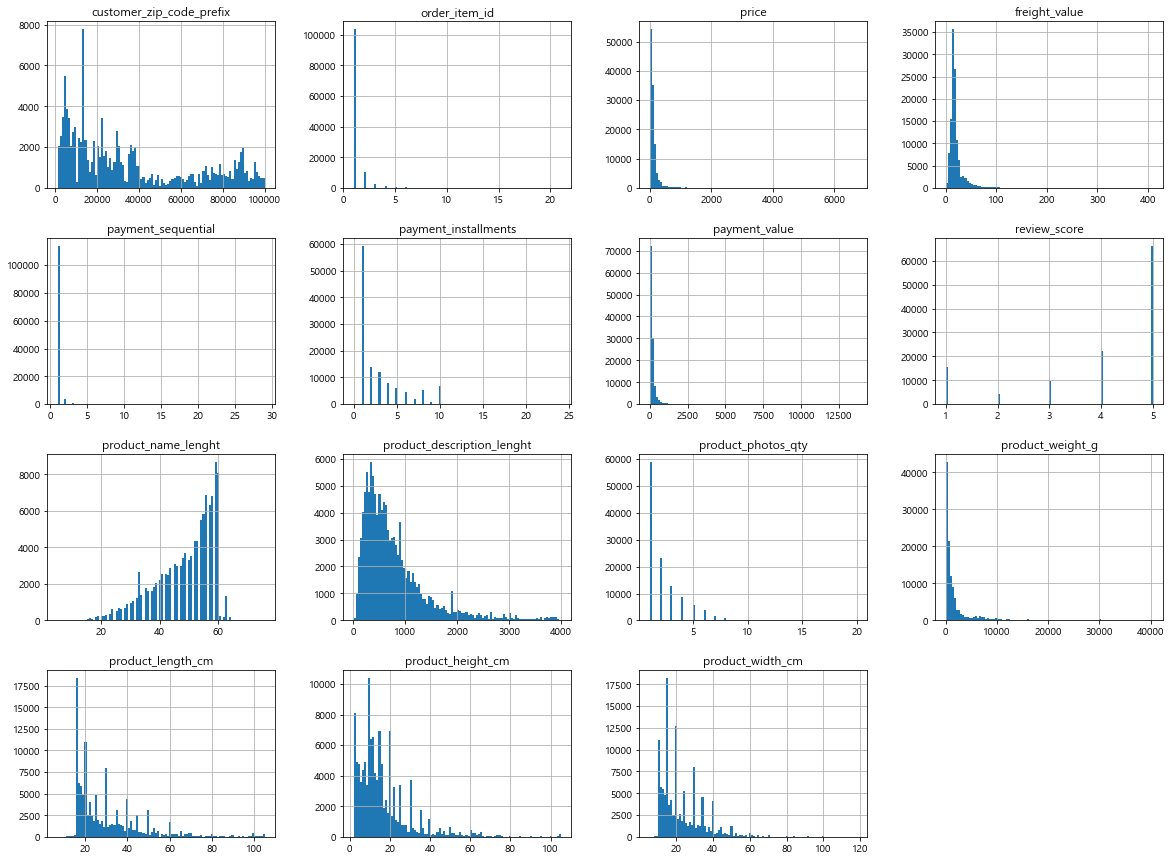

In [12]:
_ = df.hist(figsize=(20, 15), bins=100)

In [13]:
df.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           997
review_score                        997
review_comment_title             105154


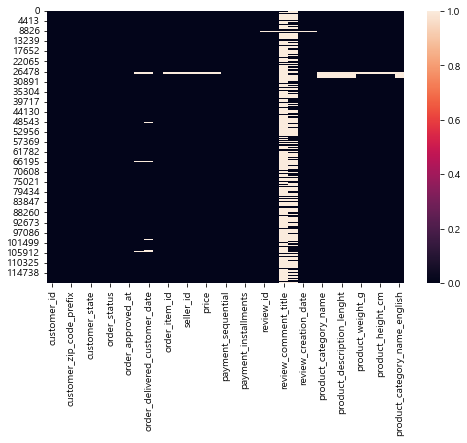

In [14]:
plt.figure(figsize = (8, 5))
sns.heatmap(df.isnull())
plt.show()

# 4 지불 수단 별 구매특징 분석 

In [15]:
#  지불수단 빈도수 측정 
df['payment_type'].value_counts()

credit_card    87776
boleto         23190
voucher         6465
debit_card      1706
not_defined        3
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

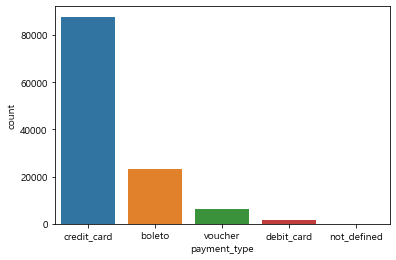

In [16]:
#  지불수단 빈도수 측정 시각화 - count plot
ax = sns.countplot(data = df, x = 'payment_type')
ax

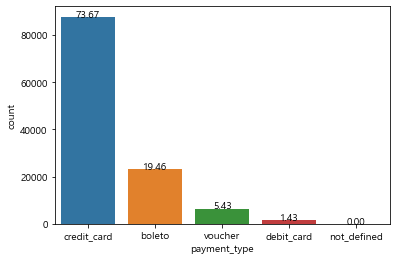

In [17]:
# https://codesample-factory.tistory.com/993 참조
# 막대 별 비율 알고 싶으면...
total = len(df)
ax = sns.countplot(data = df, x = 'payment_type')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total*100),
            ha="center") 

In [18]:
# 직불카드가 전체 결제의 74%.. 현금 19% 

In [19]:
# 지불 수단 별 구매상품 빈도수 확인해볼까?  - 구매성향? 파악  
# row 전체 출력
pd.set_option('display.max_row', 500)
ay = pd.crosstab(df['product_category_name_english'],df['payment_type'])
ay.sort_values('credit_card', ascending = False)

payment_type,boleto,credit_card,debit_card,voucher
product_category_name_english,,,,
bed_bath_table,1903,9081,145,859
health_beauty,1878,7605,157,389
sports_leisure,1795,6671,127,411
furniture_decor,1751,6440,102,539
computers_accessories,2177,5483,148,342
housewares,1328,5431,114,507
watches_gifts,1027,4866,63,257
telephony,1023,3404,80,219
toys,735,3300,46,200


<AxesSubplot:xlabel='payment_type', ylabel='product_category_name_english'>

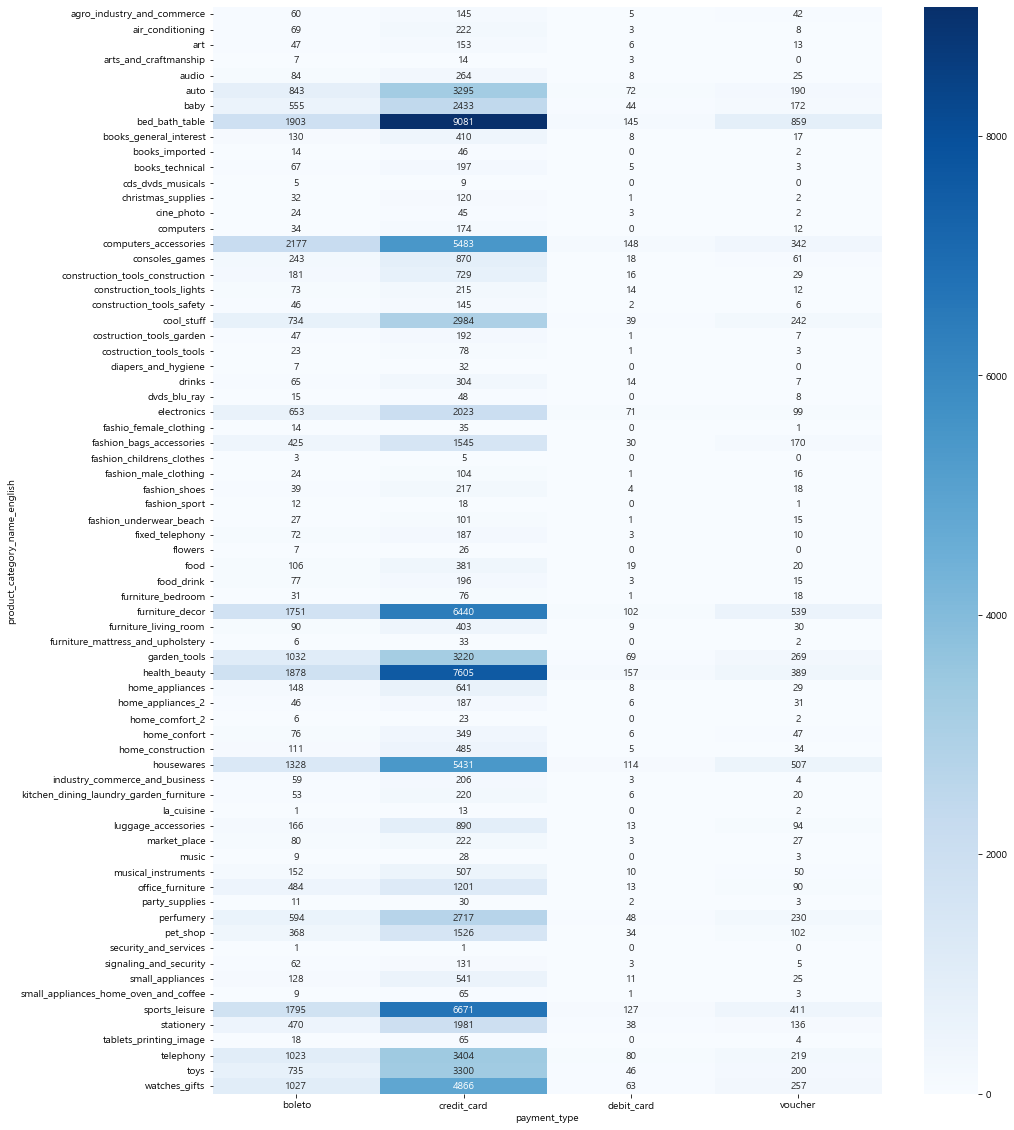

In [20]:
plt.figure(figsize = (15,20))
sns.heatmap(data = ay,
annot = True,
cmap = 'Blues', fmt = '.0f')

## 지불수단은 구매상품과 연관이 없음. 그냥 카드 결제가 많은 것임